<a href="https://colab.research.google.com/github/KaisenWu/TikToc_Data_Classification/blob/main/TikTok_Data_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part1: Dataset Description and Dataframe Preperation

In [1]:
# Import required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataframe.
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TikTok_Classification_Project/tiktok_dataset.csv")

## Part 2: Explotory Data Analysis (EDA)

### Dataset Inspection

In [3]:
# Check the first 5 rows of the dataframe.
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Check the data type, value count and null values in the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


*Observation: The data types are all correct. There are null values exist.*

In [5]:
# Get summary statistics info.
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [6]:
# Get the size of dataset.
df.size

232584

In [7]:
# Get the shape of the dataset.
df.shape

(19382, 12)

In [8]:
# Get the fetures' name of the dataframe.
df.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count'],
      dtype='object')

#### Check and Handle the Null and Duplicated Values

In [9]:
# Check the number of null values in each features.
df.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [10]:
# Get the proportion of the rows which contain null values.
print("There are {:.2%} of rows contain null values".format(df.isnull().sum().max() / df.shape[0]))

There are 1.54% of rows contain null values


*Observation: Not too many rows have null values. It's safe to remove all the rows with null values.*

In [11]:
# Remove all the rows which contains null values.
df.dropna(axis=0, inplace=True)

In [12]:
# Recheck the null value info.
df.isnull().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [13]:
# Check duplicated rows.
df.duplicated().sum()

0

*Observation: No duplicated row exits.*

#### Drop the unrelated features.

In [14]:
# Drop the # and video_id columns.
df.drop(axis=1, columns=['#', 'video_id'], inplace=True)

### Features Investigation & Processing

#### Single Feature Analysis
In this step, we will investigate the main numerical and categorical features.

##### Outlier Detection

<Axes: title={'center': 'video_duration_sec box plot'}, xlabel='video_duration_sec'>

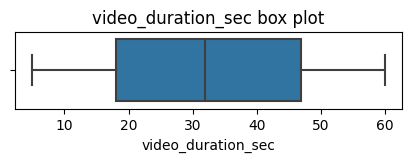

In [15]:
# Create box plot of the video duration.
plt.figure(figsize=(5,1))
plt.title('video_duration_sec box plot')
sns.boxplot(x=df['video_duration_sec'])

<Axes: title={'center': 'video_duration_sec distribution histogram'}, xlabel='video_duration_sec', ylabel='Count'>

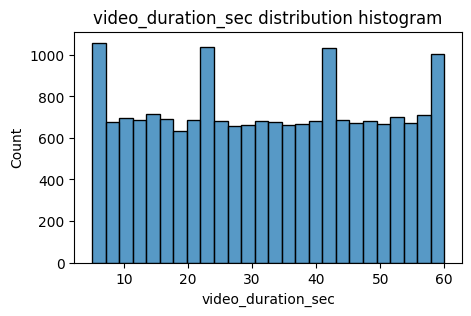

In [16]:
# Create a histogram to show the distribution of video duration.
plt.figure(figsize=(5,3))
plt.title("video_duration_sec distribution histogram")
sns.histplot(df['video_duration_sec'])

*Observation: The video duration has a uniform distribution.*

<Axes: title={'center': 'video_view_count box plot'}, xlabel='video_view_count'>

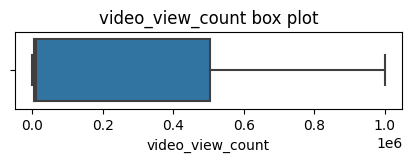

In [17]:
# Create box plot of the video view count.
plt.figure(figsize=(5,1))
plt.title('video_view_count box plot')
sns.boxplot(x=df['video_view_count'])

<Axes: title={'center': 'video_view_count distribution histogram'}, xlabel='video_view_count', ylabel='Count'>

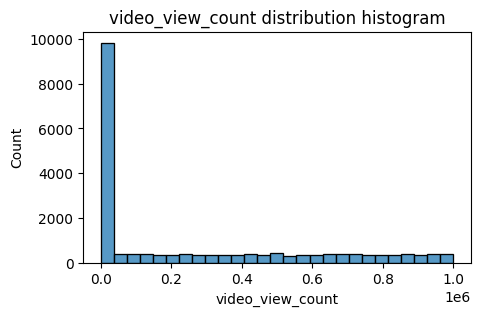

In [18]:
# Create a histogram to show the distribution of video view count.
plt.figure(figsize=(5,3))
plt.title("video_view_count distribution histogram")
sns.histplot(df['video_view_count'])

<Axes: title={'center': 'video_like_count box plot'}, xlabel='video_like_count'>

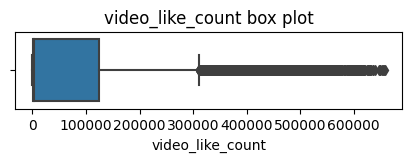

In [19]:
# Create box plot of the video like count.
plt.figure(figsize=(5,1))
plt.title('video_like_count box plot')
sns.boxplot(x=df['video_like_count'])

<Axes: title={'center': 'video_like_count distribution histogram'}, xlabel='video_like_count', ylabel='Count'>

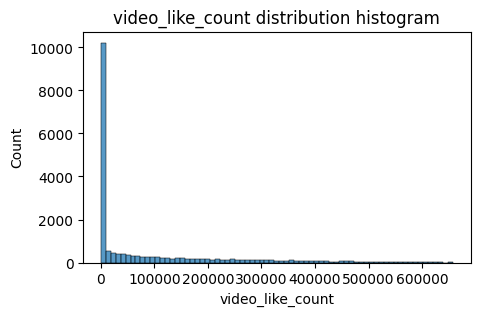

In [20]:
# Create a histogram to show the distribution of video like count.
plt.figure(figsize=(5,3))
plt.title("video_like_count distribution histogram")
sns.histplot(df['video_like_count'])

<Axes: title={'center': 'video_comment_count box plot'}, xlabel='video_comment_count'>

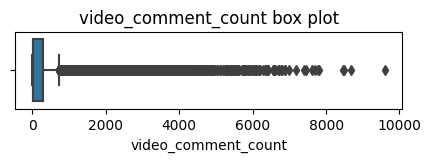

In [21]:
# Create box plot of the video comment count.
plt.figure(figsize=(5,1))
plt.title('video_comment_count box plot')
sns.boxplot(x=df['video_comment_count'])

<Axes: title={'center': 'video_comment_count distribution histogram'}, xlabel='video_comment_count', ylabel='Count'>

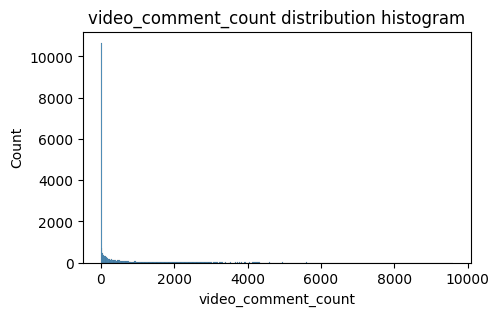

In [22]:
# Create a histogram to show the distribution of video comment count.
plt.figure(figsize=(5,3))
plt.title("video_comment_count distribution histogram")
sns.histplot(df['video_comment_count'])

<Axes: title={'center': 'video_download_count box plot'}, xlabel='video_download_count'>

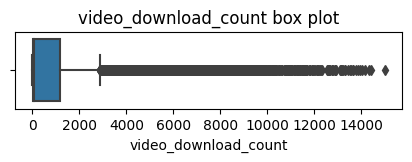

In [23]:
# Create box plot of the video download count.
plt.figure(figsize=(5,1))
plt.title('video_download_count box plot')
sns.boxplot(x=df['video_download_count'])

<Axes: title={'center': 'video_download_count distribution histogram'}, xlabel='video_download_count', ylabel='Count'>

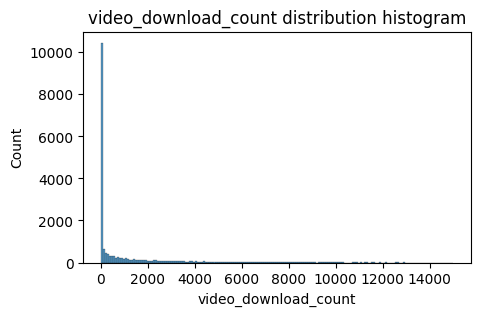

In [24]:
# Create a histogram to show the distribution of video_download_count.
plt.figure(figsize=(5,3))
plt.title("video_download_count distribution histogram")
sns.histplot(df['video_download_count'])

*Observation: For all of the engagement features, the vast majority of vedios are grouped at the bottom. The distributions is extream right-skewed.*

In [25]:
# Check the balance of the claim_status.
df['claim_status'].value_counts(normalize=True)

claim      0.503458
opinion    0.496542
Name: claim_status, dtype: float64

*Observation: The counts of each claims are quit balanced.*

In [26]:
# Check the categorical features.
df['verified_status'].value_counts(normalize=True)

not verified    0.93712
verified        0.06288
Name: verified_status, dtype: float64

*Observation: The verified status feture is extream unbalanced.*

In [27]:
df['author_ban_status'].value_counts(normalize=True)

active          0.806068
under review    0.108258
banned          0.085674
Name: author_ban_status, dtype: float64

*Observation: Vast major of videos' status are active.*

##### Determine how to handle the outliers.
According to the outlier count calculation above. The counts of outliers in each engagement feature are similar.

What I'm going to do is calculating the proportion of the outliers of the biggest number among all the engagement features.

Then determine how to process the outliers.

##### Determine outlier count of each engagement feature.

In [28]:
# Create a engagement column list.
cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

In [29]:
# Print the number of outlier in each engagement features.
for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  median = df[col].median()
  lower_outlier_threshold = median - 1.5*iqr
  upper_outlier_threshold = median + 1.5*iqr
  total_outlier_cnt = (df[col] > upper_outlier_threshold).sum() + (df[col] < lower_outlier_threshold).sum()
  print("The number of outliers in {} is {}".format(col, total_outlier_cnt))

The number of outliers in video_view_count is 2343
The number of outliers in video_like_count is 3468
The number of outliers in video_share_count is 3732
The number of outliers in video_download_count is 3733
The number of outliers in video_comment_count is 3882


In [30]:
# Calculate the proportion of the biggest count.
out_prop = ((df['video_comment_count'] > upper_outlier_threshold).sum() + (df['video_comment_count'] < lower_outlier_threshold).sum()) / df.shape[0]
print("The proportion of the ourliers biggest count is: {:.2%}".format(out_prop))

The proportion of the ourliers biggest count is: 20.34%


*Observation: According to the calculation above, there are more than 20% of rows can be recgnized as outliers. In this case, it's not a good idea to remove all the outliers. On this step, I'm going to keep them in the dataframe.*

#### Multi-Features Analysis
At this step, we will investigate the impact among different features.

##### claim_status VS all engagement fetures.

In [31]:
# Get the mean and median of each numerical features group by the author ban status.
df.groupby('claim_status').agg({'video_duration_sec':['mean','median'],
                                     'video_view_count':['mean','median'],
                                     'video_like_count':['mean','median'],
                                     'video_share_count':['mean','median'],
                                     'video_download_count':['mean','median'],
                                     'video_comment_count':['mean','median']})

video_duration_sec        video_view_count            \
                           mean median             mean    median   
claim_status                                                        
claim                 32.486886   32.0    501029.452748  501555.0   
opinion               32.359856   32.0      4956.432250    4953.0   

             video_like_count           video_share_count           \
                         mean    median              mean   median   
claim_status                                                         
claim           166373.331182  123649.0      33026.416216  17997.5   
opinion           1092.729844     823.0        217.145631    121.0   

             video_download_count         video_comment_count         
                             mean  median                mean median  
claim_status                                                          
claim                 2070.952227  1139.5          691.164863  286.0  
opinion                 13.677290     7.0            2.697446    1.0

*Observation: There is a significate different engagement trend between different claim status. "claim" has more engagement than "opinion". The claim status may have a strong corelation with the different count features.*

*Observation: There is no significant corelation between claim status and video duration. However, there are far more engagement count for the videos with the 'claim' status.*

##### claim_status VS verified_status

In [32]:
# Get the count number which aggregate by the different claim status and verified status.
df.groupby(['claim_status', 'verified_status']).count()['video_view_count']

claim_status  verified_status
claim         not verified       9399
              verified            209
opinion       not verified       8485
              verified            991
Name: video_view_count, dtype: int64

Text(0.5, 1.0, 'The count of claim status by verification status')

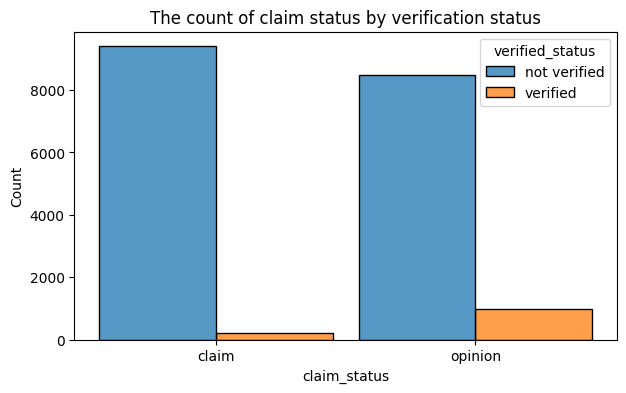

In [33]:
# Plot the count of claim status by verification status.
plt.figure(figsize=(7,4))
sns.histplot(data=df,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
plt.title('The count of claim status by verification status')

*Observation: There are far fewer verified users than unverified. And no obvious corelation was found between the claim status and verified status.*

##### claim_status VS author_ban_status

In [34]:
# Get the count number which aggregate by the different claim status and verified status.
df.groupby(['claim_status', 'author_ban_status']).count()['video_view_count']

claim_status  author_ban_status
claim         active               6566
              banned               1439
              under review         1603
opinion       active               8817
              banned                196
              under review          463
Name: video_view_count, dtype: int64

Text(0.5, 1.0, 'The count of claim status by verification status')

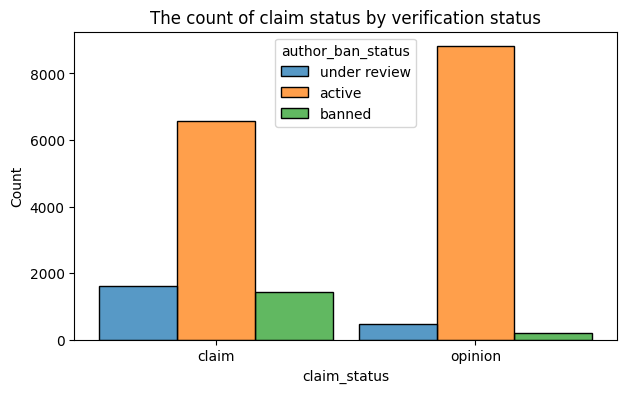

In [35]:
# Plot the count of claim status by ban status.
plt.figure(figsize=(7,4))
sns.histplot(data=df,
             x='claim_status',
             hue='author_ban_status',
             multiple='dodge',
             shrink=0.9)
plt.title('The count of claim status by verification status')

*Observation: For both claim status videos, there are many more active authors than ban and under review ones. If the vedio is a claim one, it is more likely to be banned or under review.*

##### author_ban_status VS all engagement features

In [36]:
# Get the mean and median of each numerical features group by the author ban status.
df.groupby('author_ban_status').agg({'video_duration_sec':['mean','median'],
                                     'video_view_count':['mean','median'],
                                     'video_like_count':['mean','median'],
                                     'video_share_count':['mean','median'],
                                     'video_download_count':['mean','median'],
                                     'video_comment_count':['mean','median']})

video_duration_sec        video_view_count            \
                                mean median             mean    median   
author_ban_status                                                        
active                     32.550933   33.0    215927.039524    8616.0   
banned                     32.323547   32.0    445845.439144  448201.0   
under review               31.556631   31.0    392204.836399  365245.5   

                  video_like_count           video_share_count           \
                              mean    median              mean   median   
author_ban_status                                                         
active                71036.533836    2222.0      14111.466164    437.0   
banned               153017.236697  105573.0      29998.942508  14468.0   
under review         128718.050339   71204.5      25774.696999   9444.0   

                  video_download_count        video_comment_count         
                                  mean median                mean median  
author_ban_status                                                         
active                      882.276344   28.0          295.134499    5.0  
banned                     1886.296024  892.0          614.956575  209.0  
under review               1631.734753  610.5          542.480639  136.5

*Observation: There is no significant difference of video duration among different author ban status. Videos which are banned or under review have more engagements, including like, share, downliad and comment. In most of the fetures, the mean is far greater than the median, which means some videos have really high engagement count.*

##### verified_status VS video_view_count
At this step, I will use Hypothesis Testing to check if verified_status will affect video_view_count number.

Firstly, I state the null hypothesis and alternative hypothesis below:


*   $H_0$: There is no difference in number of views posted by different verified status account.
*   $H_1$: There is difference in number of views posted by different verified status account.

Secondly, I define the significant level as $5$%.

Then, conduct the testing by using two-sample t-test compare means as follows.



In [37]:
# Create samples from the dataframs.
not_verified_cnt = df[df['verified_status'] == 'not verified']['video_view_count']
verified_cnt = df[df['verified_status'] == 'verified']['video_view_count']

In [38]:
# Import the scipy stats package.
from scipy import stats

In [39]:
# Conduct t-test.
stats.ttest_ind(a=not_verified_cnt, b=verified_cnt, equal_var=False)

Ttest_indResult(statistic=25.499441780633777, pvalue=2.6088823687177823e-120)

*Observation: Due to the P-Value is less than 5%, I reject the $H_0$. And confirm there is a statistically significant difference in the mean video view count between different verified status account.*

##### egagement features proportion VS claim_status VS author_ban_status

In [40]:
# Create new features to have a better understand of the relationship between view count and other engagement count.
df['like_per_view'] = df['video_like_count'] / df['video_view_count']
df['comment_per_view'] = df['video_comment_count'] / df['video_view_count']
df['share_per_view'] = df['video_share_count'] / df['video_view_count']
df['download_per_view'] = df['video_download_count'] / df['video_view_count']

In [41]:
# Generate report to show the different engagement proportion.
df.groupby(['claim_status', 'author_ban_status']).agg({'like_per_view': ['count','mean','median'],
                                                       'comment_per_view': ['count','mean','median'],
                                                       'share_per_view': ['count','mean','median'],
                                                       'download_per_view': ['count','mean','median'],})

like_per_view                      \
                                       count      mean    median   
claim_status author_ban_status                                     
claim        active                     6566  0.329542  0.326538   
             banned                     1439  0.345071  0.358909   
             under review               1603  0.327997  0.320867   
opinion      active                     8817  0.219744  0.218330   
             banned                      196  0.206868  0.198483   
             under review                463  0.226394  0.228051   

                               comment_per_view                      \
                                          count      mean    median   
claim_status author_ban_status                                        
claim        active                        6566  0.001393  0.000776   
             banned                        1439  0.001377  0.000746   
             under review                  1603  0.001367  0.000789   
opinion      active                        8817  0.000517  0.000252   
             banned                         196  0.000434  0.000193   
             under review                   463  0.000536  0.000293   

                               share_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.065456  0.049279   
             banned                      1439  0.067893  0.051606   
             under review                1603  0.065733  0.049967   
opinion      active                      8817  0.043729  0.032405   
             banned                       196  0.040531  0.030728   
             under review                 463  0.044472  0.035027   

                               download_per_view                      
                                           count      mean    median  
claim_status author_ban_status                                        
claim        active                         6566  0.004133  0.003083  
             banned                         1439  0.004240  0.003142  
             under review                   1603  0.004112  0.003091  
opinion      active                         8817  0.002712  0.001977  
             banned                          196  0.002580  0.001804  
             under review                    463  0.002777  0.002053

*Observation: There is no obvious clue that the claim status and author ban status will affect the engagement proportions.*

In [42]:
# Drop the per_view cilumns.
df.drop(['like_per_view', 'comment_per_view', 'share_per_view', 'download_per_view'], axis=1, inplace=True)

# Part3: Feature Engineering
According to the observations above, in this step, I will implement feature engineering as follows:

1.   Use resampling to create classes balance.
2.   Convert the video_transcript_text to valuble numerical feature.
3.   Encode the categorical features.




## Use resampling to create verified_status class balance.

### Re-check the class balance.

In [43]:
# Check the class balance of chategorical features.
df['claim_status'].value_counts(normalize=True)

claim      0.503458
opinion    0.496542
Name: claim_status, dtype: float64

In [44]:
df['verified_status'].value_counts(normalize=True)

not verified    0.93712
verified        0.06288
Name: verified_status, dtype: float64

In [45]:
df['author_ban_status'].value_counts(normalize=True)

active          0.806068
under review    0.108258
banned          0.085674
Name: author_ban_status, dtype: float64

### Resampling the Target feature.

In [46]:
# Import the required library.
from sklearn.utils import resample

In [47]:
# Split the classes.
df_majority = df[df['verified_status'] == 'not verified']
df_minority = df[df['verified_status'] == 'verified']

In [48]:
# Due to the object amount of minority class is too small, I will upsample the mojority class.
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=0)

In [49]:
# Concat the two dataframs to a balanced one.
df_balanced = pd.concat([df_majority, df_minority_upsampled]).reset_index(drop=True)

In [50]:
# Re-check the balance of the classes.
df_balanced['verified_status'].value_counts(normalize=True)

not verified    0.5
verified        0.5
Name: verified_status, dtype: float64

### Convert the video_transcript_text to text length.

In [51]:
df_balanced['text_len'] = df_balanced['video_transcription_text'].apply(lambda x:len(x))

In [52]:
# Drop the original chategorical feature.
df_balanced.drop(['video_transcription_text'], axis=1, inplace=True)

### Encode all the categorical features.

In [53]:
df_balanced =  pd.get_dummies(df_balanced, columns=['author_ban_status','claim_status','verified_status'], drop_first=True)

In [54]:
df_balanced.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_len,author_ban_status_banned,author_ban_status_under review,claim_status_opinion,verified_status_verified
0,59,343296.0,19425.0,241.0,1.0,0.0,97,0,1,0,0
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,0,0,0,0
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,0,0,0,0
3,25,437506.0,239954.0,34812.0,1234.0,584.0,131,0,0,0,0
4,19,56167.0,34987.0,4110.0,547.0,152.0,128,0,0,0,0


# Part 4: Further EDA.

## Get the corelations among different features.

In [55]:
# Print the corelation matrix.
df_balanced.corr()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_len,author_ban_status_banned,author_ban_status_under review,claim_status_opinion,verified_status_verified
video_duration_sec,1.000000,0.013589,0.004890,0.002206,0.003989,-0.004586,-0.002981,-0.011113,-0.017150,-0.017787,-0.023303
video_view_count,0.013589,1.000000,0.832832,0.711313,0.690048,0.583485,0.244693,0.197926,0.156097,-0.810610,-0.299538
video_like_count,0.004890,0.832832,1.000000,0.850053,0.828082,0.706140,0.202386,0.175049,0.136707,-0.674719,-0.244425
video_share_count,0.002206,0.711313,0.850053,1.000000,0.710117,0.620182,0.171651,0.144452,0.125569,-0.576959,-0.193260
video_download_count,0.003989,0.690048,0.828082,0.710117,1.000000,0.857679,0.173396,0.150568,0.126437,-0.564807,-0.213388
video_comment_count,-0.004586,0.583485,0.706140,0.620182,0.857679,1.000000,0.149750,0.124947,0.109038,-0.478565,-0.159679
text_len,-0.002981,0.244693,0.202386,0.171651,0.173396,0.149750,1.000000,0.081200,0.045782,-0.296496,-0.118941
author_ban_status_banned,-0.011113,0.197926,0.175049,0.144452,0.150568,0.124947,0.081200,1.000000,-0.080761,-0.230580,-0.109435
author_ban_status_under review,-0.017150,0.156097,0.136707,0.125569,0.126437,0.109038,0.045782,-0.080761,1.000000,-0.182564,-0.077189
claim_status_opinion,-0.017787,-0.810610,-0.674719,-0.576959,-0.564807,-0.478565,-0.296496,-0.230580,-0.182564,1.000000,0.369094


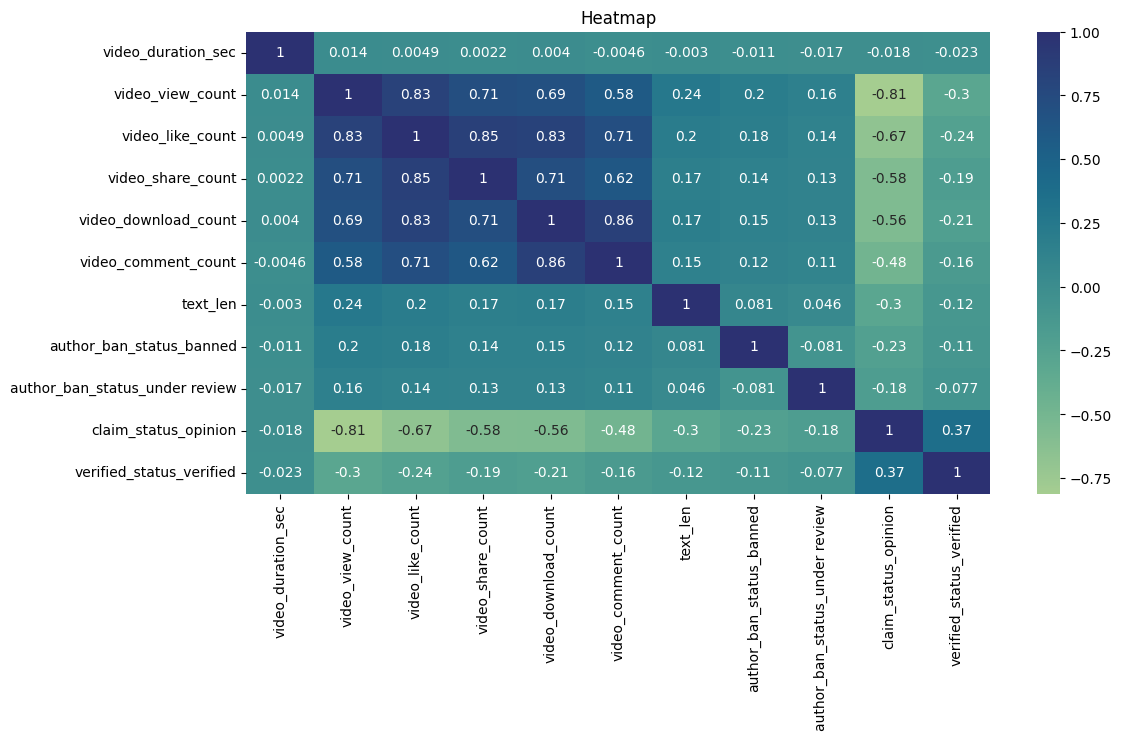

In [56]:
# Visualize the correlation heatmap.
plt.figure(figsize=(12,6))
sns.heatmap(df_balanced.corr(), annot=True, cmap='crest')
plt.title('Heatmap')
plt.show()

*Observation: According to the correlation matrix and heatmap above, the engagement features have very strong correlation.*

# Part 5: Building the baseline model.
In this part. I will use sklear Logistic Regression algorism to build a baseline mode and prepare to hyperparameter tuning and algorism selection.

## Training Preperation.

In [57]:
# Import the required libraries.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [58]:
# Split the target and other features.
y = df_balanced['verified_status_verified']
X = df_balanced.drop('verified_status_verified', axis=1)

In [59]:
# Split the training set and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [60]:
# Declare a logistic classifier object.
log_clf = LogisticRegression()

## Traing the baseline model.

In [61]:
# Using the model to fit the training set.
log_clf.fit(X_train, y_train)

LogisticRegression()

## Predicting the testing set and implement the evaluation.

In [62]:
# Predict the testing set.
y_pred = log_clf.predict(X_test)

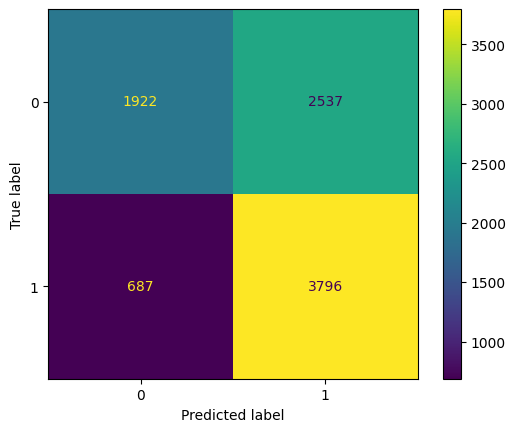

In [63]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

In [64]:
# Create classification report for logistic regression model
target_labels = ["verified", "not verified"]
print(classification_report(y_test, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.43      0.54      4459
not verified       0.60      0.85      0.70      4483

    accuracy                           0.64      8942
   macro avg       0.67      0.64      0.62      8942
weighted avg       0.67      0.64      0.62      8942



## Print the model coefficients.

In [65]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,1.355234e-03
1,video_view_count,-2.420932e-06
2,video_like_count,-1.312175e-07
3,video_share_count,5.729121e-06
4,video_download_count,-2.119851e-04
5,video_comment_count,3.854594e-04
6,text_len,3.501774e-03
7,author_ban_status_banned,-3.010897e-06
8,author_ban_status_under review,-3.286972e-07
9,claim_status_opinion,6.202213e-05


# Part 6: Hyperparameter Tuning.
In this step, I will inplement the processes includes:


1.   Split the dataset into training, validation and testing set as the proportion 60/20/20.
2.   Using RandomForestClassifier and XGBClassifier with different hyperparameters to tune the hyperparameters.
3.   Evaluating the models with validation set.
4.   Using the best model to predict the testing set.



## Split the dataset.

In [66]:
# Seperate the testing set.
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [67]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0)

## Build models.

## Import required libraries.

In [68]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

### Build ramdom forest model.

In [69]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
            #  'max_features': 'auto'
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75,100,200],
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [70]:
# Implement cross validation.
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring={'accuracy', 'precision', 'recall', 'f1'})

In [71]:
# Examine best recall score
rf_cv.best_score_

0.9994397759103641

In [72]:
# Examine best parameters
rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.3,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

## Build XGBoost model.

In [73]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [74]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring={'accuracy', 'precision', 'recall', 'f1'})

In [75]:
xgb_cv.best_score_

0.9992530781172324

In [76]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 3,
 'n_estimators': 500}

## Evaluating the best model.

In [77]:
# Use the random forest "best estimator" model to get predictions on the validation set
y_pred = rf_cv.best_estimator_.predict(X_val)

### Visualizing the confusion matrix.

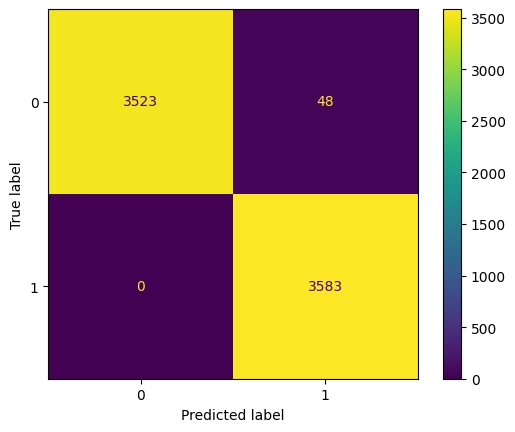

In [78]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

### Print the evaluation report.

In [79]:
# Create a classification report
# Create classification report for random forest model
target_labels = ["verified", "not verified"]
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       1.00      0.99      0.99      3571
not verified       0.99      1.00      0.99      3583

    accuracy                           0.99      7154
   macro avg       0.99      0.99      0.99      7154
weighted avg       0.99      0.99      0.99      7154



# Part 7: Final Evaluation.

In [80]:
# Use champion model to predict on test data
y_pred = rf_cv.best_estimator_.predict(X_test)

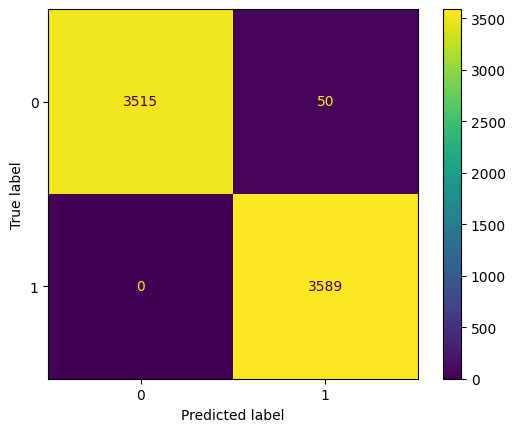

In [81]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

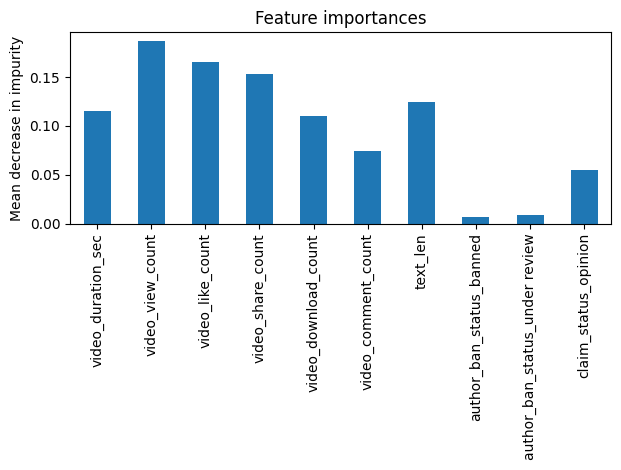

In [82]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()